# Business Understanding 
	
	The employees in the tech workplace works with high intensity and pressure. Their mental health should raise their employers’ attention. Employers should know how much percentage of their tech employers are troubled by mental health disorder, and what can be the common features of such employees.  
    
	OSMI Mental Health in Tech Survey 2016 has1433 results and 63 features which includes numerical and categorical features. Twelve of the features are used to find the answers of the questions above. 	
    
	The data set will be analyzed, visualized, explored, etc. it can tell the distribution of the employees with mental health disorder, and how different features can affect the distribution. 
    
	Employers could use the analytics to have a better idea of their tech employees’ mental health, and what can possible cause the mental illness. Therefore, the overall mental health condition of teach employee can raise employers’ attention, and can better improved. 

    Dataset: OSMI Mental Health in Tech Survey 2016 URL: https://www.kaggle.com/osmi/mental-health-in-tech-2016#  
    
    Questions Of Interest: 
    
        -How are tech employees with mental health disorder distributed? 
        
        -What are the common features of the tech employees with mental health disorder?


In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('./data/mental-heath-in-tech-2016_20161114.csv')
data = np.array([df['What is your age?'],
        df['What is your gender?'],
        df['What country do you live in?'],
        df['What country do you work in?'],
        df['How many employees does your company or organization have?'],
        df['Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?'],
        df['Do you have a family history of mental illness?'],
        df['Have you had a mental health disorder in the past?'],
        df['Do you currently have a mental health disorder?'],
        df['Have you ever sought treatment for a mental health issue from a mental health professional?'],
        df['Do you work remotely?']
       ])

columns= ['age',
         'gender',
         'residence_location',
         'work_location',
         'num_employees',
         'employer_awareness',
         'family_history',
         'past_history',
         'current_state',
         'treatment',
         'remote']
df = pd.DataFrame(data = data)
df = df.T
df.columns = columns
df

FileNotFoundError: File b'./data/mental-heath-in-tech-2016_20161114.csv' does not exist

In [ ]:
print(df.info())

In [ ]:
df.info()
df.describe()


        According to the data frame information, there are some missing data in the gender, num_employees and employer_awareness columns since there are total 1433 rows of data, and there might be some weird numbers in the rows. 

In [ ]:
df.describe()

In [4]:
data_des = pd.DataFrame()
data_des['Features'] = df.columns
data_des['Description'] = ['age of the worker',
                           'gender of the worker',
                           'the countery where the worker lives',
                           'the country where the worker works',
                           'how many employees works within the workplace where the worker works', 
                           'whether the employer has formally discussed about the mental health of the worker', 
                           'whether the worker has family hisotry of mental disorder', 
                           'whether the worker has experienced mental disorder in the past',
                           'whether the worker is currently having mental disorder',
                           'if the worker has mental disorder experience, whether he/she sought fot treatment from professinals',
                           'whether the worker work remotely']
data_des['Scales'] = [
    'ordinal',
    'nominal',
    'nominal',
    'nominal',
    'interval',
    'nominal',
    'nominal',
    'nominal',
    'nominal',
    'nominal',
    'nominal'
]

data_des['Discrete/Continuous'] = ['discrete'] * 4 + ['continuous'] + ['discrete'] * 6
data_des 

NameError: name 'df' is not defined

The table above show the description of features. Obviously the data needs some kind of clean up to improve the data quality accroding to the info. 

In [ ]:
# lets check for any wonky entries in age
df[df.age.apply(lambda x: type(x)!=np.int64)]
# casting as an int
df.age = df.age.astype(np.int64)
df.drop(df[(df.age<16) | (df.age > 65)].index, inplace=True)
#gender
df.gender.replace(to_replace=['Male', 'M', 'male', 'm'], value='Male', inplace=True)
df.gender.replace(to_replace=['Female', 'F', 'female', 'f'], value='Female', inplace=True)
df = df[df.gender.isin(['Male','Female'])]
#number of employees
df.dropna(subset=['num_employees'], inplace=True) #deletes the self-employeed workers.
#treatment
df.treatment = df.treatment.astype(bool)
df
df.info()

In [ ]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

In [ ]:
df.groupby('past_history').count()

In [ ]:
labels = ['with past history','without past history','maybe']
sizes = [525, 365, 175]
explode = (0.1,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Distribution of the employees with past history of mental disorder.")
plt.show()

In [ ]:
df.groupby('current_state').count()

In [ ]:
labels = ['Maybe ','currently not experiencing','currently experiencing']
sizes = [241, 422, 402]
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Employees who currently troubled by mental disorder')
plt.show()

According to the two graphs above, almost half of the employees who toke the survey have had issue of mental health disorder in the current or past. Concerning the ones who were not sure about their mental health condition, employers should be awares that most of their employees can be troubled by mental disorder. 

In [ ]:
#numerized the features
df.current_state.replace(to_replace = ['No','Maybe','Yes'],
                       value = [0,1,2],
                       inplace = True)
df.past_history.replace(to_replace = ['No','Maybe','Yes'],
                       value = [0,1,2],
                       inplace = True)
df

In [ ]:
#treatment
df.groupby('treatment').count()

In [ ]:
labels = ['accept the treatment','do not accept']
sizes = [593,472]
explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

As we can see from the graph above, most of the employees who realized that they have issue with their mental health, they would like seeking help from a mental health professional. 

In [ ]:
#treatment
df.groupby('employer_awareness').count()

In [ ]:
labels = ['i do not know','employer has not formally discussed about mental health', 'employer has formally discussed about mental health']
sizes = [97, 757, 211]
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Distribution of Employer Awareness")
plt.show()

    Obviously, most employers have not formally concerned about the mental health condition of their employees, which can be mostly bad. 

# Relationships

    There can be many potential associations between the features found in the survey. 
    
    In order to better understand the common features of the workers with mental health disorder, it's important to find the analytic relationships between the features. 
    
    The two core features in the data set are 'past_hisotry' and 'current_state'. 
    
    
    

In [3]:
df_both = df[(df['current_state'] == 1) & (df['past_history'] == 1)]
df_both
print('people who both experience the mental disorder currently and in the past '+ str(df_both.age.count()))

df_current = df[(df['current_state'] == 1) & (df['past_history'] == 0)]
print('people who only experience the mental disorder currently '+ str(df_current.age.count()))

df_past = df[(df['current_state'] == 0) & (df['past_history'] == 1)]
print('people who only experience the mental disorder in the past '+ str(df_past.age.count()))

NameError: name 'df' is not defined

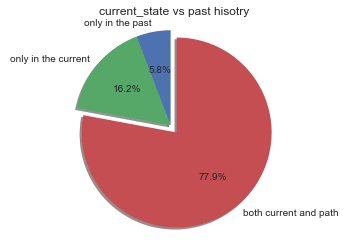

In [71]:
labels = ['only in the past','only in the current', 'both current and path']
sizes = [27,75,360]
explode = (0,0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('current_state vs past hisotry')
plt.show()

    Concerning the attribute of past_history and current_hisotry can be maybe, yes or no. There can be totally 9 different combinations of the two attributes:
        yes, no
        no, yes
        no, no
        yes, yes
        maybe, yes
        yes, maybe
        maybe, no 
        no, maybe
        maybe, maybe

        Since the "maybe" is very ambigous, we decide to treat "maybe" as no. 
        Therefore, as we want to filter out people who either has past, current, or both experience of mental disorder, we need one more attributes to simplify the future analitics. 
        Then, we apply or operation to the two features, it gives us a new one which is "past or current experience"(poc).
        According to the graph above, it shows that almost 80 percent of the people who have mental health disorder in the current, also have had mental health disorder in the past. The sypmtom can be repeated as the time goes. 

In [62]:
df['poc'] = df['current_state'] | df['past_history']
df.poc.replace(to_replace = range(4),
          value = [0,0,1,1],
          inplace = True)
df


,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote,poc
0,39,Male,United Kingdom,United Kingdom,26-100,No,No,2,0,False,Sometimes,1
1,29,Male,United States of America,United States of America,6-25,Yes,Yes,2,2,True,Never,1
4,43,Female,United States of America,United States of America,6-25,No,Yes,2,2,True,Sometimes,1
5,42,Male,United Kingdom,United Kingdom,More than 1000,No,No,0,2,True,Sometimes,1
6,30,Male,United States of America,United States of America,26-100,No,No,0,0,False,Sometimes,0
7,37,Female,United States of America,United States of America,More than 1000,No,Yes,2,2,True,Always,1
8,44,Female,United States of America,United States of America,26-100,No,Yes,2,2,True,Sometimes,1
10,28,Male,United States of America,United States of America,26-100,Yes,I don't know,2,2,True,Never,1
11,34,Male,United States of America,United States of America,100-500,No,Yes,2,2,True,Sometimes,1
12,30,Female,United States of America,United States of America,100-500,No,Yes,2,2,True,Always,1


    Now, it's avalaible to see the distribution of poc in the overall data set.

In [72]:
df.groupby('poc').count()

,age,gender,residence_location,work_location,num_employees,employer_awareness,family_history,past_history,current_state,treatment,remote
poc,,,,,,,,,,,
0,498,498,498,498,498,498,498,498,498,498,498
1,567,567,567,567,567,567,567,567,567,567,567


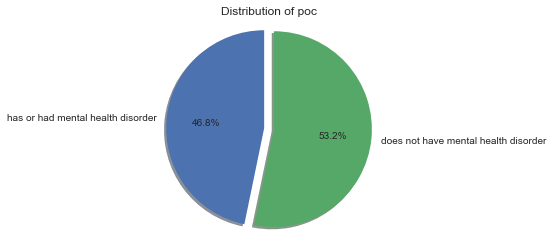

In [74]:
labels = ['has or had mental health disorder', 'does not have mental health disorder']
sizes = [498, 567]
explode = (0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of poc')
plt.show()

    Relation between Employer_awareness and whether have experience of mental disorder

poc                   0    1
employer_awareness          
I don't know         55   42
No                  350  407
Yes                  93  118


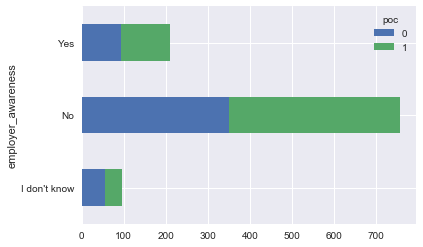

In [63]:
poc_vs_emp = pd.crosstab(df['employer_awareness'], df['poc'])
print (poc_vs_emp)
poc_vs_emp.plot(kind = 'barh', stacked = True)

    The relationship between poc and employer_awarness is not obvious. As the graph shows, most people either had or having the mental health disorder problem in most companies. 
    
Relationship between employer_awareness and treatment

treatment           False  True 
employer_awareness              
I don't know           48     49
No                    341    416
Yes                    83    128


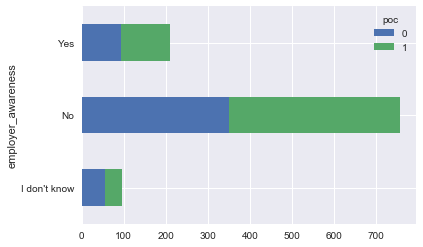

In [64]:
#Employer awareness and treatment
poc_vs_treat = pd.crosstab(df['employer_awareness'], df['treatment'])
print (poc_vs_treat)
poc_vs_emp.plot(kind = 'barh', stacked = True)

    Similar as the employe wareness vs poc, the relationship between treatment and employer's wareness is also not obvious. More than half of employees who had or having the mental health disorder would like to receive treatment from mental health professionals in most companies. 